# Introduction

This project addresses the take-home challenge for data-scientist interviewees at Ultimate Technologies, Inc. The project comprises three parts: exploratory data analysis (EDA), experiment and metrics design, and predictive modeling. 

# Exploratory Data Analysis

Starting with a set of timestamps of user logins in a particular geographic location, I will aggregate login counts based on 15-minute time intervals before visualizing and describing the results in a time-series context. Additional attention wil go to important features of demand, such as daily cycles, and data-quality issues.

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read in dataset
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
# no missing values
print(pd.isnull(logins['login_time']).value_counts())

False    93142
Name: login_time, dtype: int64


In [3]:
# create 15-minute intervals by resampling

logins.set_index('login_time', inplace=True) #reset time stamp
logins['count'] = 1 #add units to aggregate with
logins_agg = logins.resample('15T').sum() #15-minute intervals; aggregate by summation 

In [4]:
logins_agg.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


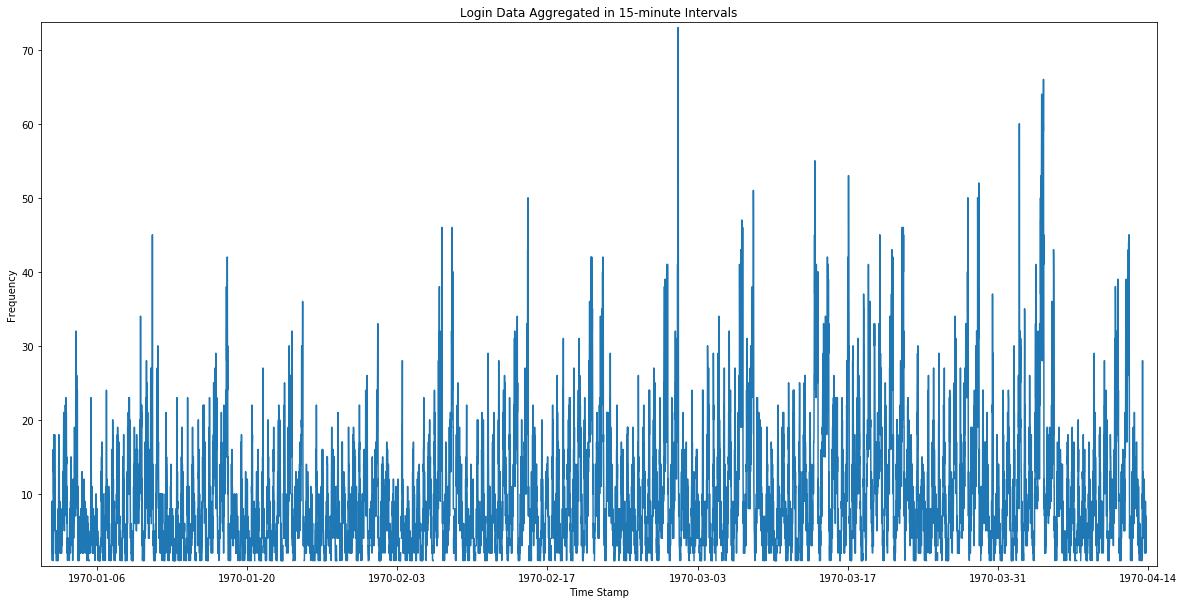

In [5]:
plt.figure(figsize=(20,10))

plt.plot(logins_agg)
plt.title('Login Data Aggregated in 15-minute Intervals')
plt.xlabel('Time Stamp')
plt.ylabel('Frequency')
plt.margins(0.01)
plt.show()

Even with the enlarged graph, it's hard to discern clear patterns. I'll next look at the data aggregated by day of the week. 

In [59]:
# daily cycles -- first aggregate by day of the week (Monday = 0; Sunday = 6)

logins_new = pd.read_json('logins.json') # read in dataset again to avoid conflicts with earlier changes to df

logins_new['day_of_week'] = logins_new['login_time'].dt.dayofweek
logins_new.head()

,login_time,day_of_week
0,1970-01-01 20:13:18,3
1,1970-01-01 20:16:10,3
2,1970-01-01 20:16:37,3
3,1970-01-01 20:16:36,3
4,1970-01-01 20:26:21,3


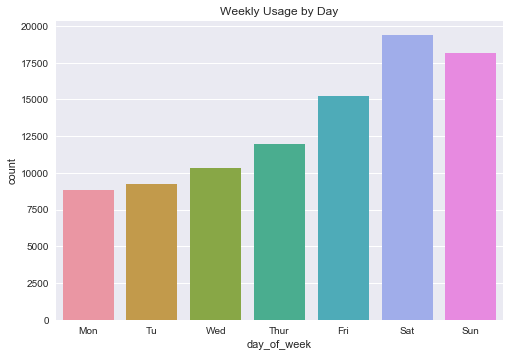

In [14]:
# plot overall usage by day

days = ['Mon', 'Tu', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ax = sns.countplot(x = 'day_of_week', data = logins_new)
ax.set(xticklabels = days)
plt.title('Weekly Usage by Day')
plt.show() 

Usage increases over the course of the week, hitting a high on Saturdays. Overall usage is higher on weekends, too. Next, I will explore usage by time of day, showing weekdays and weekends separately. 

In [65]:
# resample -- aggregate by one-hour intervals

logins = pd.read_json('logins.json') # read in dataset again to avoid conflicts with earlier changes to df

logins.set_index('login_time', inplace=True) 
logins['count'] = 1 
logins_hr = logins.resample('60T').sum()

In [66]:
logins_hr.head()

,count
login_time,
1970-01-01 20:00:00,24.0
1970-01-01 21:00:00,9.0
1970-01-01 22:00:00,21.0
1970-01-01 23:00:00,58.0
1970-01-02 00:00:00,53.0


In [71]:
# add day of week

logins_hr['day_of_week'] = logins_hr.index.dayofweek
logins_hr.head()

,count,day_of_week
login_time,,
1970-01-01 20:00:00,24.0,3
1970-01-01 21:00:00,9.0,3
1970-01-01 22:00:00,21.0,3
1970-01-01 23:00:00,58.0,3
1970-01-02 00:00:00,53.0,4


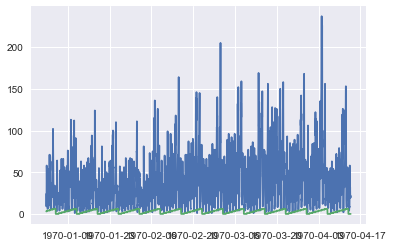

In [73]:
plt.plot(logins_hr)
plt.show()

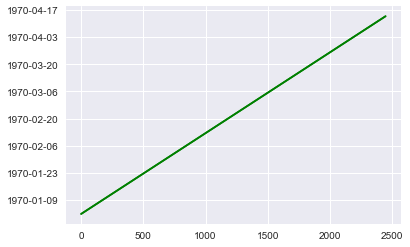

In [85]:
logins_hr['weekend'] = np.where(logins_hr['day_of_week'] > 5, 1, -1)

fig, ax = plt.subplots()

def day_ID(group):
    global ax
    color = 'b' if (group['day_of_week'] < 0).all() else 'g'
    ax.plot(group.index, c=color) 

logins_hr.groupby((logins_hr['day_of_week'].shift() * logins_hr['day_of_week'] < 0).cumsum()).apply(day_ID)
plt.show()


UnboundLocalError: local variable 'x' referenced before assignment

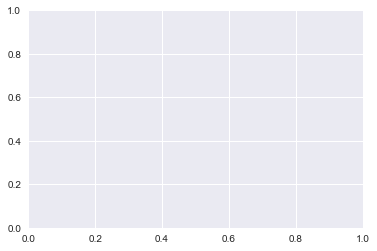

In [94]:
sns.tsplot(logins_hr, time = logins_hr.index) #create dictionary for colors?

In [ ]:
# visualize usage by time of month, perhaps "controlling" for weekday vs. weekend